In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error,r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('Family-Income-and-Expenditure.csv')

In [ ]:
df

In [3]:
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


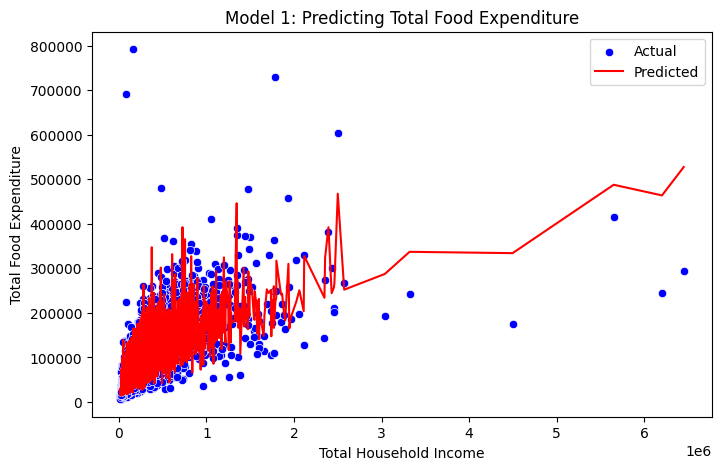

In [8]:
plt.figure(figsize=(8,5))

# Scatter of real data
sns.scatterplot(x=X1_test['Total Household Income'], y=y1_test, color='blue', label='Actual')

# Prediction line
sns.lineplot(x=X1_test['Total Household Income'], y=y1_pred, color='red', label='Predicted')

plt.title("Model 1: Predicting Total Food Expenditure")
plt.xlabel("Total Household Income")
plt.ylabel("Total Food Expenditure")
plt.legend()
plt.show()

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression


# -----------------------------------------
# 1️⃣ Predicting Total Food Expenditure
# -----------------------------------------

# Select simple features
X1 = df[['Total Household Income',
         'Bread and Cereals Expenditure',
         'Total Rice Expenditure',
         'Meat Expenditure']]
y1 = df['Total Food Expenditure']

# Split data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Build model
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

# Predict
y1_pred = model1.predict(X1_test)

# Evaluate
print("Prediction of Food Expenditure")
print("Mean Absolute Error:", mean_absolute_error(y1_test, y1_pred))


Prediction of Food Expenditure
Mean Absolute Error: 14782.884536452984


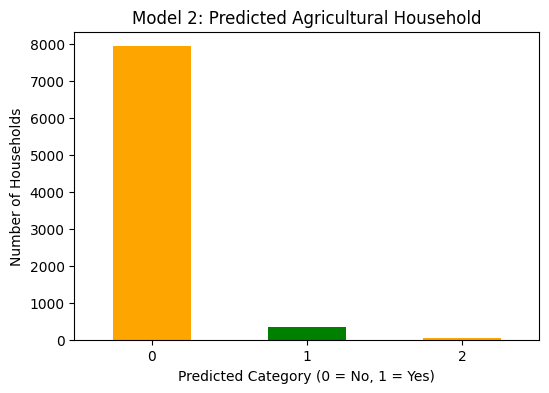

In [12]:
# Convert predictions into a small table
pred_df = pd.DataFrame({
    'Actual': y2_test,
    'Predicted': y2_pred
})

plt.figure(figsize=(6,4))
pred_df['Predicted'].value_counts().sort_index().plot(kind='bar', color=['orange','green'])

plt.title("Model 2: Predicted Agricultural Household")
plt.xlabel("Predicted Category (0 = No, 1 = Yes)")
plt.ylabel("Number of Households")
plt.xticks(rotation=0)
plt.show()

In [11]:
# -----------------------------------------
# 2️⃣ Predicting Agricultural Household
# -----------------------------------------

# Simple features again
X2 = df[['Total Household Income',
         'Total Food Expenditure',
         'Number of Cellular phone',
         'Number of Motorcycle/Tricycle']]
y2 = df['Agricultural Household indicator']

# Split data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Build model
model2 = LogisticRegression(max_iter=1000)
model2.fit(X2_train, y2_train)

# Predict
y2_pred = model2.predict(X2_test)

# Accuracy
print("\nModel 2: Prediction is it Agricultural Household")
print("Accuracy:", accuracy_score(y2_test, y2_pred))


Model 2: Prediction is it Agricultural Household
Accuracy: 0.6769767721747503


In [13]:
df.head(21).tail(10)

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
11,253130,CAR,111250,Wage/Salaries,0,46521,39217,20548,15841,1475,...,0,0,0,0,0,6,0,0,0,0
12,101111,CAR,88523,Enterpreneurial Activities,1,40531,36200,14322,8344,2200,...,0,0,0,0,0,1,0,0,0,0
13,128214,CAR,62262,Enterpreneurial Activities,1,26874,23130,10034,6971,2350,...,0,1,0,0,0,1,0,0,0,1
14,91525,CAR,45487,Other sources of Income,1,19668,16142,5430,6670,1860,...,0,0,0,0,0,0,0,0,0,0
15,171742,CAR,70892,Other sources of Income,0,30594,26788,10336,7900,1503,...,0,0,0,0,0,0,0,0,0,0
16,95385,CAR,83790,Wage/Salaries,1,41701,36200,11226,8806,1434,...,1,0,0,0,0,1,0,0,0,0
17,142843,CAR,85370,Wage/Salaries,0,44006,38213,9840,9317,1231,...,0,0,0,0,0,2,0,0,0,0
18,88170,CAR,64705,Enterpreneurial Activities,1,31984,28659,8048,7625,1625,...,0,0,0,0,0,1,0,0,0,0
19,97018,CAR,82534,Enterpreneurial Activities,1,27283,22503,10162,12370,2380,...,0,0,0,0,0,1,0,0,0,0
20,123015,CAR,73459,Enterpreneurial Activities,1,32692,28520,6638,11734,2120,...,0,0,0,0,0,1,0,0,0,0


In [27]:
# Use your existing dataframe "df"

# 1. Select numeric columns only (ML models work best with numbers)
numeric_df = df.select_dtypes(include='number')

# 2. Define features (X) and target variable (y)
X = numeric_df.drop(columns=['Total Food Expenditure'])
y = numeric_df['Total Food Expenditure']

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Create and train a simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Predict on the test set
y_pred = model.predict(X_test)

# 6. Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 SIMPLE PREDICTIVE ANALYSIS RESULTS")
print("-------------------------------------")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"R² Score: {r2:.3f}")

# 7. Show the top features affecting the prediction
feature_importance = pd.Series(model.coef_, index=X.columns)
print("\n🔎 Top 10 Most Influential Features:")
print(feature_importance.sort_values(key=abs, ascending=False).head(10))

📊 SIMPLE PREDICTIVE ANALYSIS RESULTS
-------------------------------------
Mean Absolute Error (MAE): 5,401.20
R² Score: 0.953

🔎 Top 10 Most Influential Features:
Members with age less than 5 year old    3399.380731
Number of Car, Jeep, Van                -1329.603188
Number of Washing Machine                1220.003713
Electricity                              1079.879159
Number of Refrigerator/Freezer            640.206237
Agricultural Household indicator          507.489404
Number of CD/VCD/DVD                      454.258998
Number of Motorized Banca                 430.936719
Number of Television                      430.498074
Number of Cellular phone                  397.739569
dtype: float64


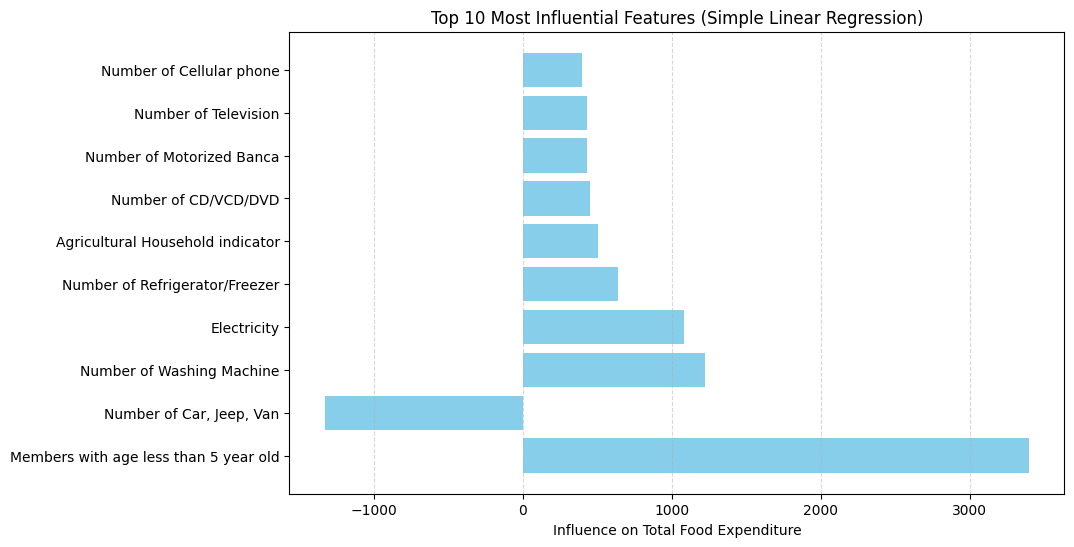

In [29]:
top = feature_importance.abs().sort_values(ascending=False).head(10)

top.plot(kind='barh', figsize=(8,5), color='skyblue')
plt.title("Top 10 Feature Importance")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

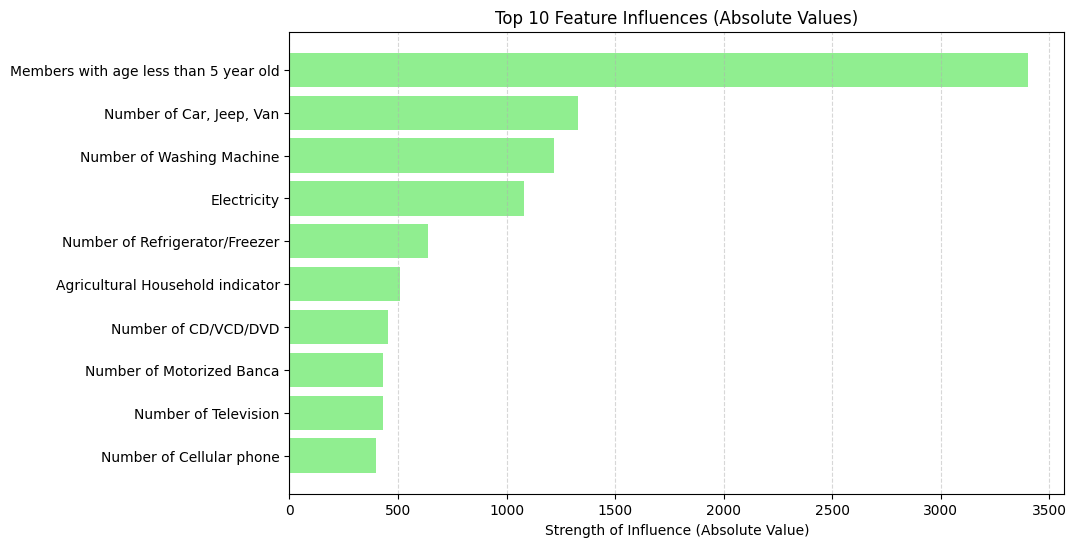

In [30]:
# Use absolute values so no negative bars
top_features_abs = top_features.abs()

plt.figure(figsize=(10, 6))
plt.barh(top_features_abs.index, top_features_abs.values, color='lightgreen')
plt.xlabel("Strength of Influence (Absolute Value)")
plt.title("Top 10 Feature Influences (Absolute Values)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()